In [30]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Logistic Regression

The activation function for this type of model is sigmoidal: 

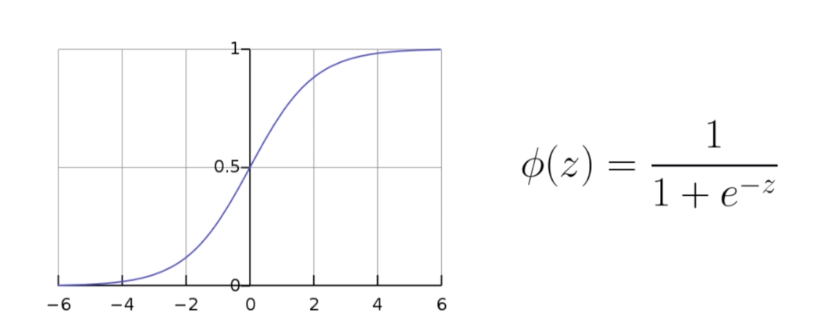

In [10]:
from IPython.display import Image
img = '/Users/lorenzofamiglini/Desktop/logi.png'
Image(filename=img)

• e = 2.79

• The sigmoidal function transform real number in a range between 0 and 1

• y^ = 1/1+e^(-z)

• Likehood (for the cost function) = l(w) = logL(W), we need to maximaze it with the gradient ascent method. 

In [11]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [13]:
breast_cancer["diagnosis"].unique() #target variable

array(['M', 'B'], dtype=object)

In [14]:
X = breast_cancer[["radius_se", "concave points_worst"]].values
Y = breast_cancer["diagnosis"].values

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

For the logistic model in scikit-learn, we don't need to encode the target variable (it's automatic), by the way we are going to encode the Y

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [17]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [18]:
Y_train[:5]

array([0, 0, 0, 1, 0])

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Metrics: 
• Accuracy 

• Log-likelihood (in scikit-learn is negative, closer we are to zero and more the model is good) --> log loss (between 0 and 1)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [25]:
Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test) # probability prediction goodness

In [26]:
print("Accuracy :" +str(accuracy_score(Y_test, Y_pred)))
print("Log Loss :"+ str(log_loss(Y_test, Y_pred_proba)))

Accuracy :0.9064327485380117
Log Loss :0.21553789916301566


# Decision Boundary:

In [31]:
def showBounds(model, X, Y, labels=["Negativo","Positivo"]):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])
    plt.legend()

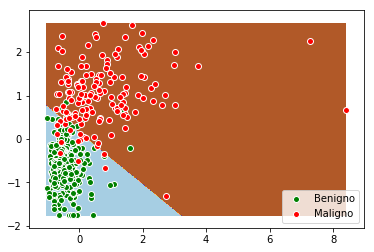

In [32]:
showBounds(lr, X_train, Y_train, labels=["Benigno","Maligno"])

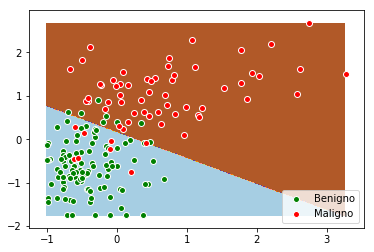

In [33]:
showBounds(lr, X_test, Y_test, labels=["Benigno","Maligno"])

# How can we do regolarization?

• lr = LogisticRegression(penalty = "l2", C = 1) default values. 
• C = 1/lambda, C>1 regolarization is weaker, C < 1 regolarization is stronger

# Multi-class Classification 

__One vs All (OvA)__

In [35]:
from sklearn.datasets import load_digits

In [37]:
digits = load_digits()

In [39]:
X = digits.data
Y = digits.target

In [43]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

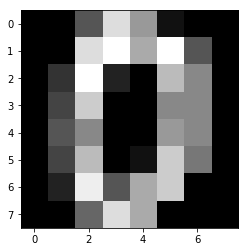

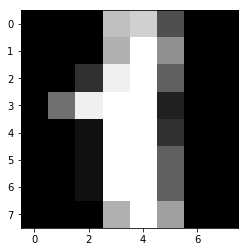

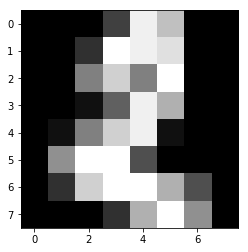

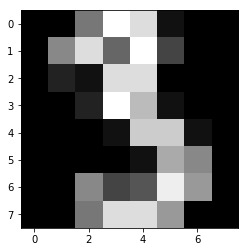

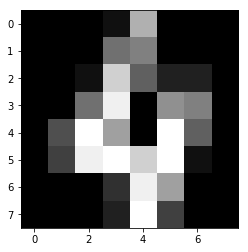

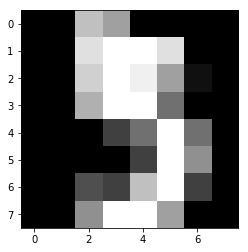

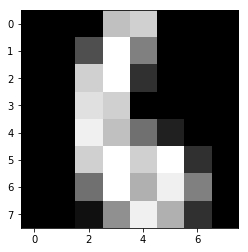

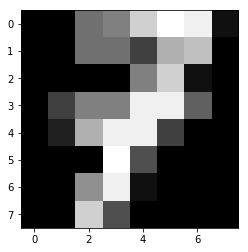

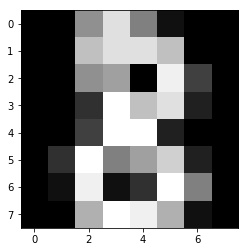

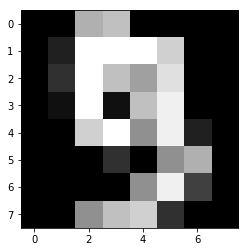

In [44]:
#let's see an immage of the target variable: 
for i in range(0,10):
    pic_matrix = X[Y==i][0].reshape([8,8])
    plt.imshow(pic_matrix, cmap = "gray")
    plt.show()

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [46]:
#Due to the type of the variable --> we need to normalize:

In [48]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

• Logistic regression  automatically recognizes if the problem is binary or multi-class

In [50]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

In [64]:
print("Accuracy :" +str(accuracy_score(Y_test, Y_pred)))
print("Log Loss :"+ str(log_loss(Y_test, Y_pred_proba)))

Accuracy :0.9592592592592593
Log Loss :0.2348103448586134


# Confusion Matrix: 

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [55]:
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 51,  0,  0],
       [ 0,  1,  1,  1,  0,  1,  0,  0, 56,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 54]])

The rows represent the right classes, and the columns represent the predicted classes. For example,in the last row (represent 9) in the sixth column, we can see that 2 immages (of nine) are classifited like 2 instead of nine. 

Text(0.5, 103.73999999999997, 'Predicted Class')

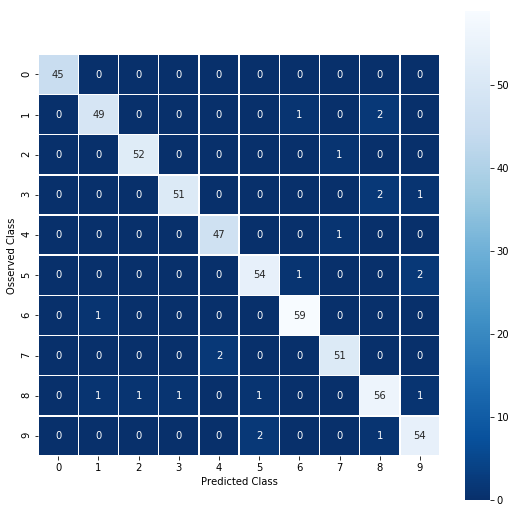

In [63]:
#Pretty confusion matrix: 
import seaborn as sns

plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, cmap = 'Blues_r', linewidths = .5, square = True)
plt.ylabel('Osserved Class')
plt.xlabel('Predicted Class')

NB: we can implement OnevsClassifier, but the result will be the same of the previous one

• from sklearn.multiclass import OneVsRestClassifier

• ovc = OneVsRestClassifier(LogisticRegression())

• ovc.fit(X_train, Y_train)